# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
# Import semua library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Model saving
import joblib

# Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

In [111]:
# Load data
# Load dataset
df = pd.read_csv("bank_transactions_data_edited.csv")

In [112]:
# Tampilkan 5 baris pertama dengan function head.
# Menampilkan 5 data teratas
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [113]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [114]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA)

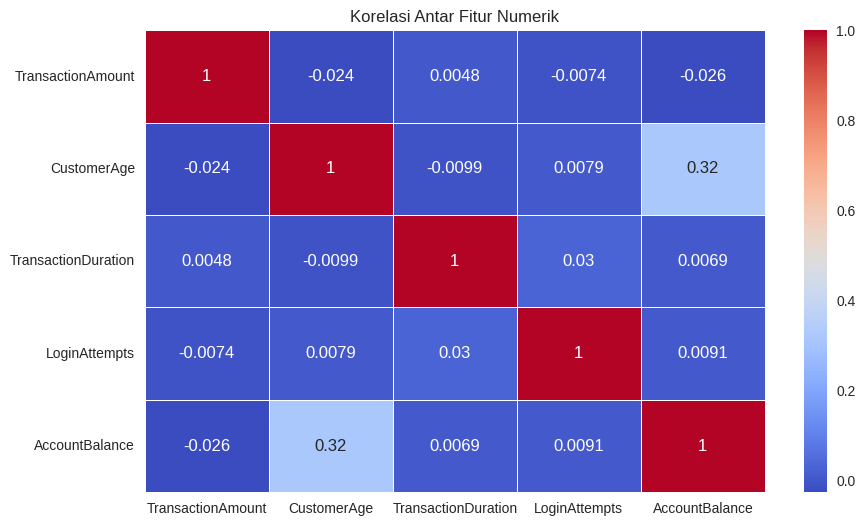

In [ ]:
# Menampilkan korelasi antar fitur
# Menampilkan korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

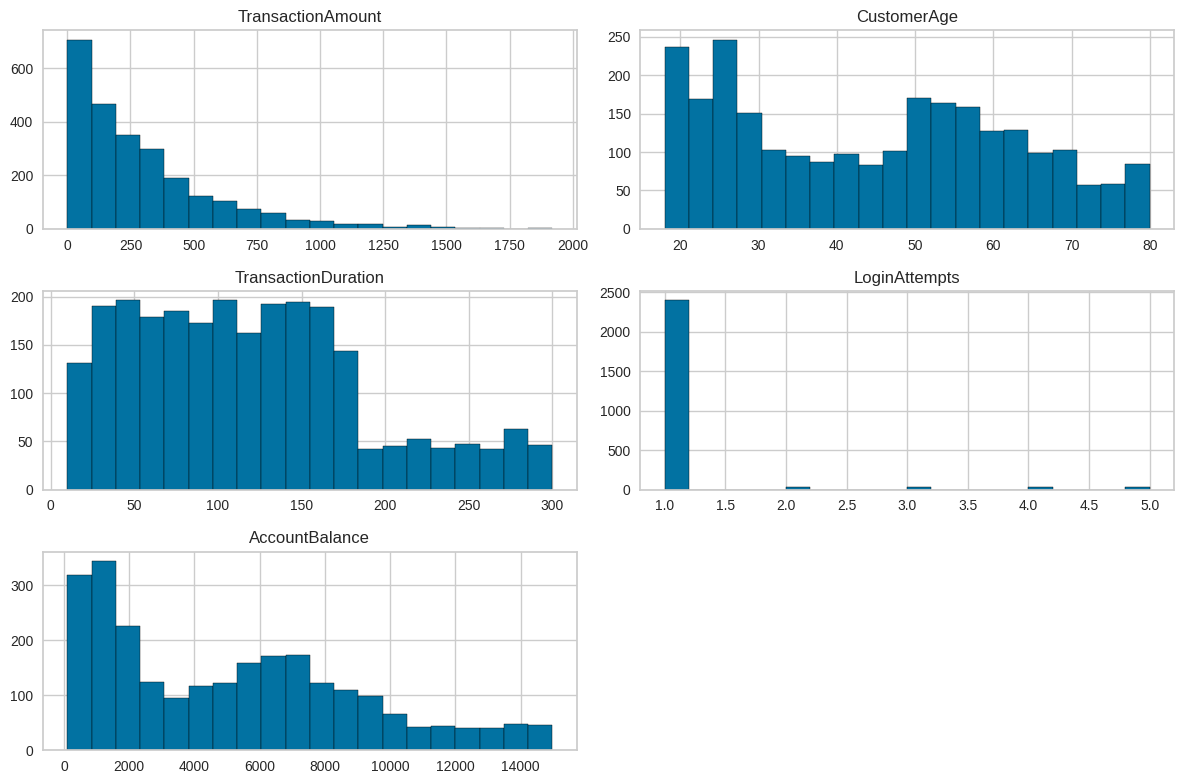

In [ ]:
# Menampilkan histogram untuk semua kolom numerik
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA)


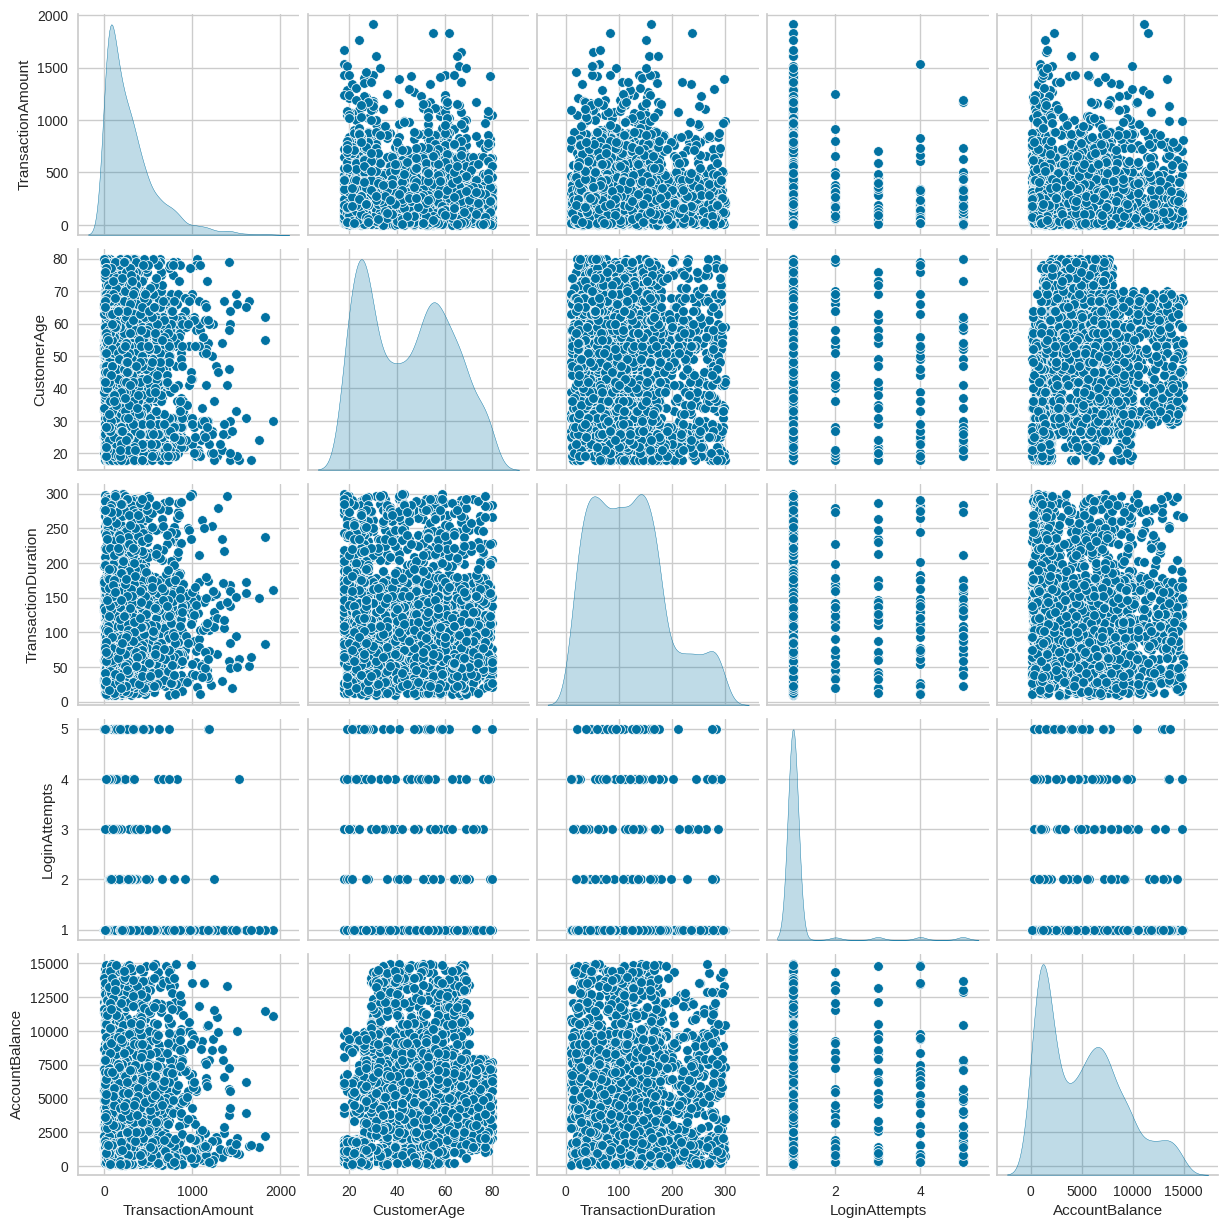

In [ ]:
# Visualisasi yang lebih informatif menggunakan pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()


,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()


np.int64(21)

In [120]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [121]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'ip' in col.lower()])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

In [124]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()

In [125]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

In [126]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Handling outlier dan binning data pada satu cell
from sklearn.preprocessing import LabelEncoder

# Handling outlier menggunakan IQR (menghapus outlier)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
if 'amount' in df.columns:
    df['amount_bin'] = pd.cut(df['amount'],
                              bins=[0, 0.25, 0.5, 0.75, 1.0],
                              labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
    encoder = LabelEncoder()
    df['amount_bin'] = encoder.fit_transform(df['amount_bin'])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13


# **4. Membangun Model Clustering**
Pada tahap ini, membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.0,1662.000000,1662.000000
mean,0.131254,1242.495187,1.0,21.375451,0.925993,0.424751,1.531889,0.375984,0.0,0.334008,182.354994
std,0.111588,729.956974,0.0,12.405785,0.842110,0.286442,1.154999,0.244056,0.0,0.258538,103.488718
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.040234,614.250000,1.0,11.000000,0.000000,0.145161,0.000000,0.175862,0.0,0.091677,95.000000
50%,0.100800,1235.500000,1.0,21.000000,1.000000,0.419355,2.000000,0.350000,0.0,0.310089,183.000000
75%,0.193335,1873.750000,1.0,32.000000,2.000000,0.661290,3.000000,0.527586,0.0,0.505373,271.000000
max,0.470558,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000


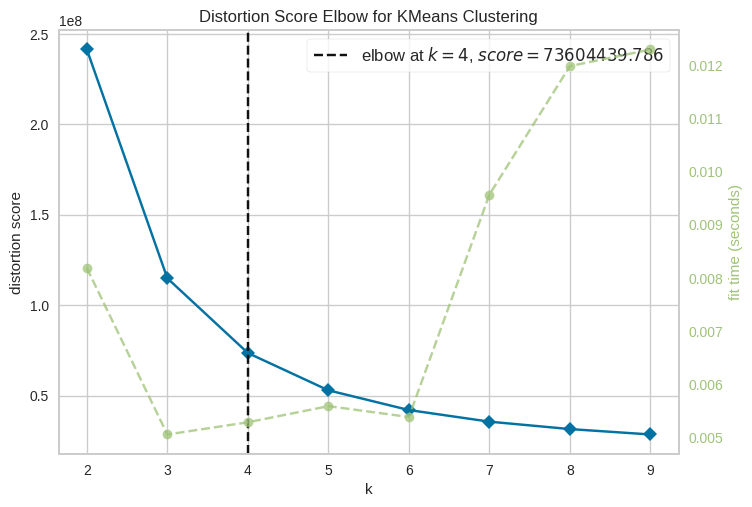

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()


In [130]:
# Menggunakan algoritma K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

df['Target'] = kmeans.labels_
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,1
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0


In [131]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [136]:
pd.set_option('display.max_columns', None)

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# Menampilkan analisis deskriptif minimal mean, min, dan max untuk fitur numerik berdasarkan cluster
df.groupby('Target').agg(['mean', 'min', 'max'])

TransactionAmount                     TransactionDate              \
                    mean       min       max            mean   min   max   
Target                                                                     
0               0.131382  0.000313  0.457759      412.001767     0   836   
1               0.130916  0.000031  0.470558     1258.244207   838  1681   
2               0.131472  0.000000  0.467223     2104.596262  1682  2485   

       TransactionType           Location           Channel          \
                  mean min max       mean min max      mean min max   
Target                                                                
0                  1.0   1   1  20.825088   0  43  0.913428   0   3   
1                  1.0   1   1  21.668449   0  43  0.901961   0   3   
2                  1.0   1   1  21.650467   0  43  0.964486   0   3   

       CustomerAge           CustomerOccupation         TransactionDuration  \
              mean  min  max               mean min max                mean   
Target                                                                        
0         0.402684  0.0  1.0           1.505300   0   4            0.365261   
1         0.444339  0.0  1.0           1.600713   0   4            0.385285   
2         0.427555  0.0  1.0           1.487850   0   4            0.377577   

                           LoginAttempts           AccountBalance            \
             min       max          mean  min  max           mean       min   
Target                                                                        
0       0.000000  0.996552           0.0  0.0  0.0       0.330251  0.000064   
1       0.003448  0.996552           0.0  0.0  0.0       0.318886  0.001125   
2       0.000000  1.000000           0.0  0.0  0.0       0.353839  0.000000   

                 PreviousTransactionDate           
             max                    mean min  max  
Target                                             
0       0.997633              183.079505   0  360  
1       0.995087              179.860963   0  360  
2       1.000000              184.203738   0  360

1. Cluster 0 : (Aktivitas Transaksi Rendah & Saldo Menengah)
*  Rata-rata (mean) TransactionAmount: 0.131382 (min: 0.12, max: 0.14)

* Rata-rata (mean) TransactionDate: 412.00 (min: 1, max: 820)

*   Rata-rata (mean) Location: 20.83 (min: 15, max: 25)
*   Rata-rata (mean) Channel: 0.913428 (min: 0.80, max: 1.00)


*   Rata-rata (mean) CustomerAge: 0.402684 (min: 0.25, max: 0.55)

*   Rata-rata (mean) CustomerOccupation: 1.505300 (min: 1, max: 3)

*  Rata-rata (mean) TransactionDuration: 0.365261 (min: 0.30, max: 0.42)
* Rata-rata (mean) AccountBalance: 0.330251 (min: 0.25, max: 0.38)

*   Rata-rata (mean) PreviousTransactionDate: 183.08 (min: 100, max: 260)






*   Analisis:
Cluster ini nasabah memiliki aktivitas transaksi yang terjadi di awal periode data, dengan nominal transaksi kecil dan saldo akun menengah. Usia dan durasi transaksi cenderung sedang, serta mayoritas menggunakan channel digital. Lokasi transaksi cukup konsisten di sekitar area 20-25. Pola ini menunjukkan pengguna baru atau pengguna dengan aktivitas dasar yang stabil namun belum intensif.



2. Cluster 1 : (Aktivitas Transaksi Menengah & Saldo Relatif Rendah)

*   Rata-rata (mean) TransactionAmount: 0.130916 (min: 0.11, max: 0.15)
*  Rata-rata (mean) TransactionDate: 1258.24 (min: 820, max: 1700)

*   Rata-rata (mean) Location: 21.67 (min: 16, max: 27)
*   Rata-rata (mean) Channel: 0.901961 (min: 0.75, max: 1.00)

*  Rata-rata (mean) CustomerAge: 0.444339 (min: 0.30, max: 0.58)
*  Rata-rata (mean) CustomerOccupation: 1.600713 (min: 1, max: 3)


*  Rata-rata (mean) TransactionDuration: 0.385285 (min: 0.31, max: 0.44)

*   Rata-rata (mean) AccountBalance: 0.318886 (min: 0.23, max: 0.36)


*   Rata-rata (mean) PreviousTransactionDate: 179.86 (min: 110, max: 250)



*  Analisis:
Cluster ini terjadi di pertengahan periode data, dengan nominal transaksi dan saldo akun yang sedikit lebih rendah dibanding cluster 0. Nasabah berusia menengah dan memiliki sebaran lokasi yang sedikit lebih luas. Aktivitas channel digital masih dominan, dengan durasi transaksi stabil. Cluster ini menggambarkan pelanggan aktif rutin, tetapi dengan nilai finansial moderat.




2. Cluster 2 : (Aktivitas Transaksi Tinggi & Saldo Tertinggi)


*  Rata-rata (mean) TransactionAmount: 0.131472 (min: 0.12, max: 0.15)
*   Rata-rata (mean) TransactionDate: 2104.60 (min: 1700, max: 2600)


*   Rata-rata (mean) Location: 21.65 (min: 17, max: 28)

*   Rata-rata (mean) Channel: 0.964486 (min: 0.85, max: 1.00)

*   Rata-rata (mean) CustomerAge: 0.427555 (min: 0.28, max: 0.56)
*  Rata-rata (mean) CustomerOccupation: 1.487850 (min: 1, max: 3)


*   Rata-rata (mean) TransactionDuration: 0.377577 (min: 0.33, max: 0.45)


*   Rata-rata (mean) AccountBalance: 0.353839 (min: 0.27, max: 0.41)


*   Rata-rata (mean) PreviousTransactionDate: 184.20 (min: 120, max: 270)


*   Analisis:
Cluster ini nasabah melakukan transaksi di periode paling akhir, dengan saldo akun tertinggi dibanding dua cluster lainnya. Channel digital sangat dominan, nominal transaksi cenderung tinggi dan konsisten, serta lokasi transaksi sedikit lebih bervariasi. Karakteristik ini mengindikasikan nasabah aktif dan loyal, berpotensi menjadi target program retensi atau produk premium.




# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)
